# 소개 (Introduction)

**미국 청소년 종단 연구 (National Longitudinal Survey of Youth) 1997-2011 데이터셋**은 미국 데이터를 다루는 사회 과학자들에게 가장 중요한 데이터베이스 중 하나입니다.

이 데이터셋을 통해 과학자들은 **소득의 결정 요인**뿐만 아니라 **교육적 성취**에 대해서도 연구할 수 있으며, 이는 **정부 정책**과 밀접한 관련이 있습니다. 또한, **다양한 인종, 성별 및 기타 요인에 따른 교육적 성취와 급여 수준의 차이**와 같은 **정치적으로 민감한 이슈**를 조명할 수도 있습니다.

이 변수들이 **교육과 소득에 미치는 영향을 더 잘 이해하게 되면**, 보다 적절한 **정부 정책**을 수립할 수도 있을 것입니다.

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


# Plotly 업그레이드

In [341]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


###  라이브러리 불러오기 (Import Statements)



In [342]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## 노트북 출력 설정 (Notebook Presentation)

In [343]:
pd.options.display.float_format = '{:,.2f}'.format

# 데이터 불러오기 (Load the Data)



In [344]:
df_data = pd.read_csv('NLSY97_subset.csv')

### 데이터 이해하기 (Understand the Dataset)

다음 파일을 확인하세요: **NLSY97_Variable_Names_and_Descriptions.csv**

---------------------------

    :주요 변수(Key Variables):
      1. S           - 학력연수 (Years of schooling (highest grade completed as of 2011))
      2. EXP         - 총 근무연수 (Total out-of-school work experience (years) as of the 2011 interview.)
      3. EARNINGS    - 시간당 소득 (Current hourly earnings in $ reported at the 2011 interview)

# 기초 데이터 탐색 🔍 (Preliminary Data Exploration)

**문제 확인 (Challenge)**

* df_data의 형태는 어떻게 되는가?(What is the shape of `df_data`? )
* 몇 개의 행과 열이 있는가? (How many rows and columns does it have?)
* 컬럼(변수) 이름은 무엇인가? (What are the column names?)
* NaN 값 또는 중복 데이터가 있는가? (Are there any NaN values or duplicates?)

In [345]:
df_data.shape

(2000, 96)

In [346]:
df_data.columns

Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE',
       'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED',
       'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO',
       'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO',
       'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT',
       'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE',
       'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN',
       'JOBS', 'HOURS', 'TENURE', 'CATGOV', 'CATPRI', 'CATNPO', 'CATMIS',
       'CATSE', 'COLLBARG', 'URBAN'

In [347]:
df_data.isnull().sum()

ID          0
EARNINGS    0
S           0
EXP         0
FEMALE      0
           ..
MSA11NO     0
MSA11NCC    0
MSA11CC     0
MSA11NK     0
MSA11NIC    0
Length: 96, dtype: int64

In [348]:
df_data.duplicated(subset=['ID']).sum()
print(df_data.duplicated(subset=['ID']).sum())  # ID 기준 중복 확인

513


## 데이터 정리 - 결측값 및 중복 데이터 확인 (Data Cleaning - Check for Missing Values and Duplicates)

중복된 행을 찾아 제거함.

In [349]:
df_data = df_data.drop_duplicates()
# ID 기준으로 중복된 행 제거 (첫 번째 값만 유지)
df_data = df_data.drop_duplicates(subset=['ID'], keep='first')
print(df_data.duplicated(subset=['ID']).sum())

0


In [350]:
# HHINC97 (1997년 가구 소득) - 중앙값 대체
df_data['HHINC97'] = df_data['HHINC97'].fillna(df_data['HHINC97'].median())
df_data.isnull().sum()

ID          0
EARNINGS    0
S           0
EXP         0
FEMALE      0
           ..
MSA11NO     0
MSA11NCC    0
MSA11CC     0
MSA11NK     0
MSA11NIC    0
Length: 96, dtype: int64

In [351]:
df_data['AGEMBTH'] = df_data['AGEMBTH'].fillna(df_data['AGEMBTH'].median())
print(df_data[['HHINC97', 'AGEMBTH']].isnull().sum())

HHINC97    0
AGEMBTH    0
dtype: int64


## 기술 통계 (Descriptive Statistics)

In [352]:
# 데이터 요약 통계 확인
print(df_data.describe())

            ID  EARNINGS        S      EXP   FEMALE     MALE    BYEAR  \
count 1,487.00  1,487.00 1,487.00 1,487.00 1,487.00 1,487.00 1,487.00   
mean  3,547.13     18.81    14.56     6.70     0.49     0.51 1,982.07   
std   2,009.84     12.00     2.77     2.86     0.50     0.50     1.38   
min       1.00      2.00     6.00     0.00     0.00     0.00 1,980.00   
25%   1,888.00     11.41    12.00     4.65     0.00     0.00 1,981.00   
50%   3,474.00     15.75    15.00     6.63     0.00     1.00 1,982.00   
75%   5,160.50     22.60    16.00     8.71     1.00     1.00 1,983.00   
max   8,980.00    132.89    20.00    14.73     1.00     1.00 1,984.00   

           AGE  AGEMBTH    HHINC97  ...    URBAN    REGNE    REGNC     REGW  \
count 1,487.00 1,487.00   1,487.00  ... 1,487.00 1,487.00 1,487.00 1,487.00   
mean     28.93    26.32  56,829.43  ...     0.78     0.16     0.27     0.34   
std       1.38     5.02  39,605.44  ...     0.43     0.36     0.44     0.47   
min      27.00    12.00   

In [353]:
# 데이터 타입 및 결측치 확인
print(df_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1487 entries, 0 to 1995
Data columns (total 96 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1487 non-null   int64  
 1   EARNINGS  1487 non-null   float64
 2   S         1487 non-null   int64  
 3   EXP       1487 non-null   float64
 4   FEMALE    1487 non-null   int64  
 5   MALE      1487 non-null   int64  
 6   BYEAR     1487 non-null   int64  
 7   AGE       1487 non-null   int64  
 8   AGEMBTH   1487 non-null   float64
 9   HHINC97   1487 non-null   float64
 10  POVRAT97  1203 non-null   float64
 11  HHBMBF    1487 non-null   int64  
 12  HHBMOF    1487 non-null   int64  
 13  HHOMBF    1487 non-null   int64  
 14  HHBMONLY  1487 non-null   int64  
 15  HHBFONLY  1487 non-null   int64  
 16  HHOTHER   1487 non-null   int64  
 17  MSA97NO   1487 non-null   int64  
 18  MSA97NCC  1487 non-null   int64  
 19  MSA97CC   1487 non-null   int64  
 20  MSA97NK   1487 non-null   int64  
 

## 특징 시각화 (Visualise the Features)

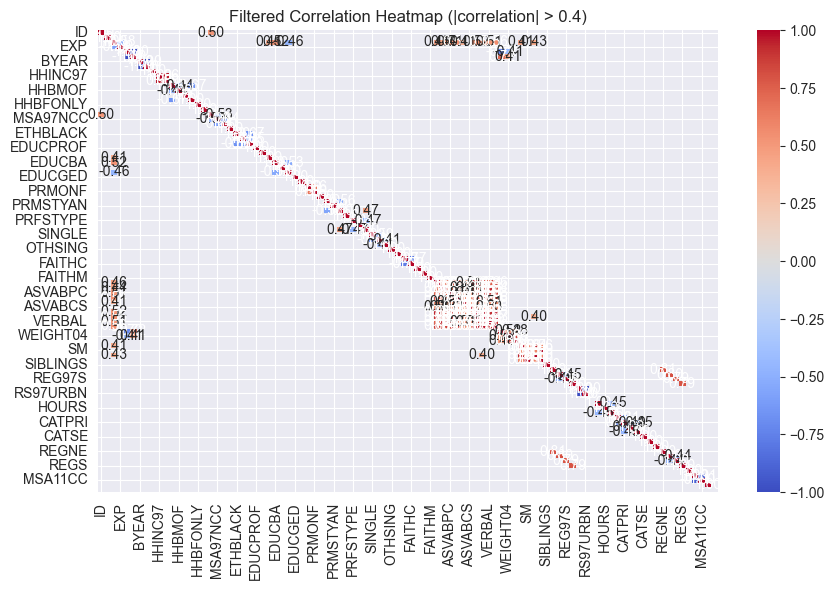

In [354]:
# 변수간 상관관계
# 상관행렬 계산
corr_matrix = df_data.corr()

# 특정 임계값 이상의 변수만 선택 (예: |상관계수| > 0.4)
threshold = 0.4
filtered_corr = corr_matrix[(corr_matrix > threshold) | (corr_matrix < -threshold)]

# 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt=".2f", mask=filtered_corr.isnull())
plt.title("Filtered Correlation Heatmap (|correlation| > 0.4)")
plt.show()

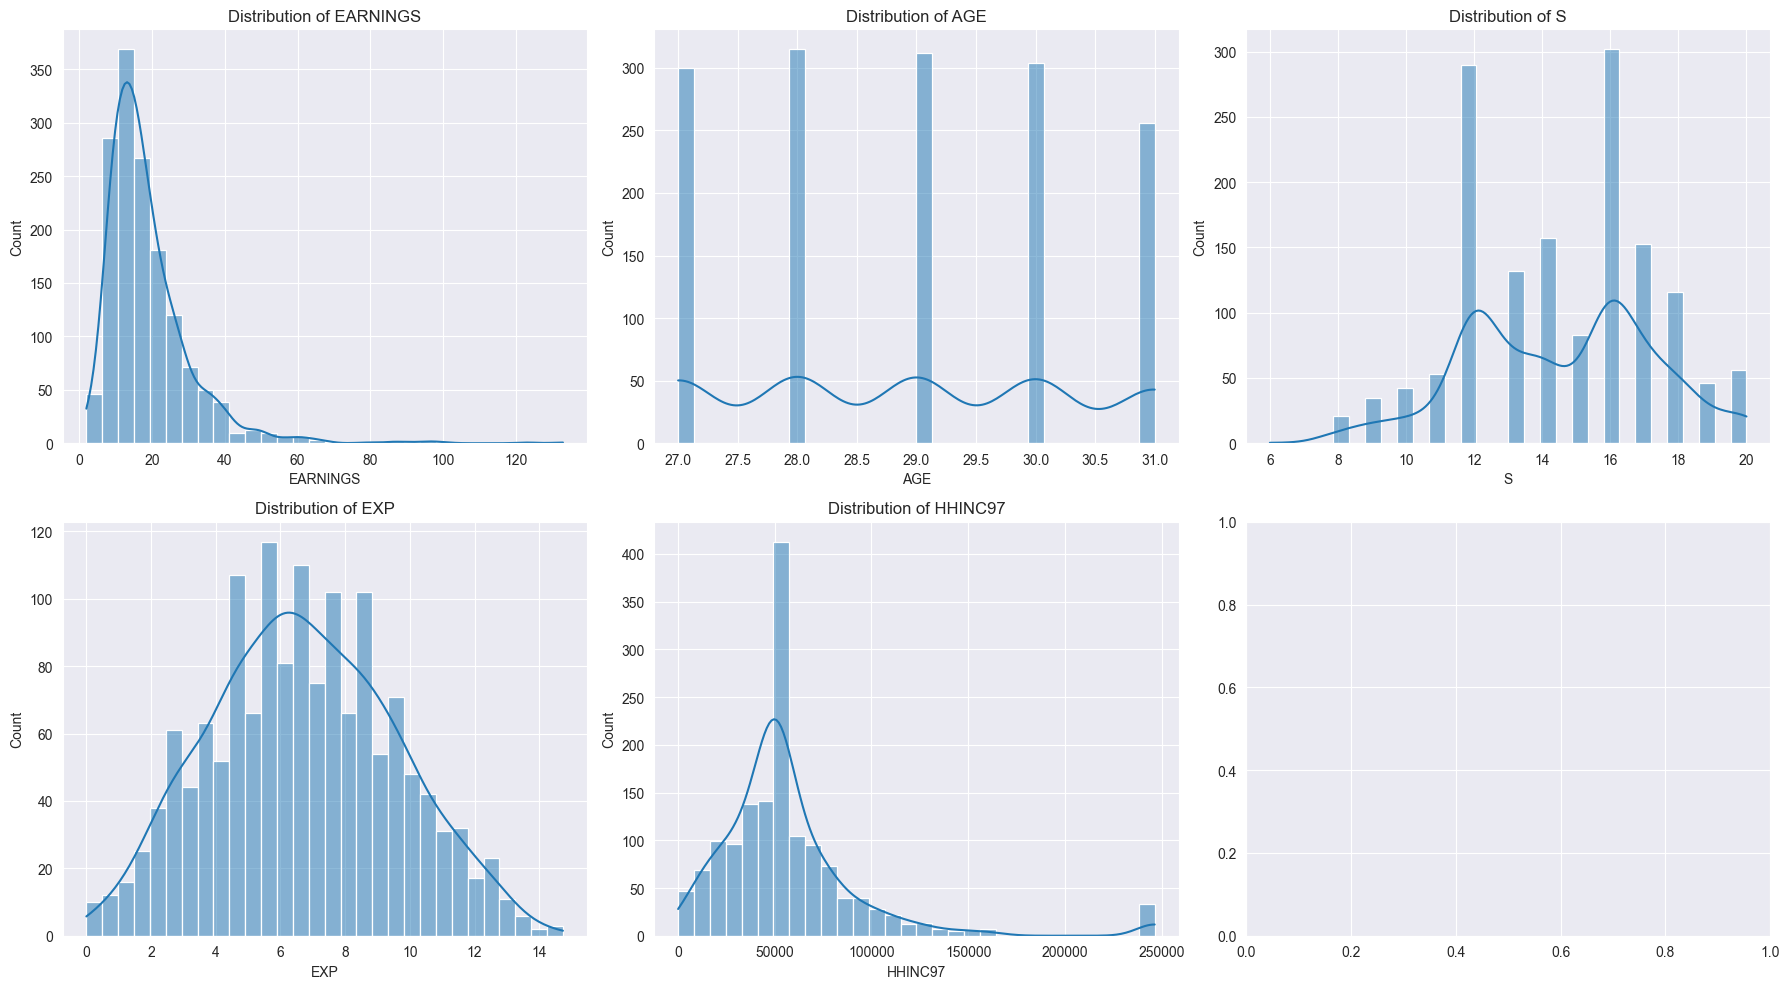

In [355]:
# 분포를 확인할 연속형 변수 목록
num_features = ['EARNINGS', 'AGE', 'S', 'EXP', 'HHINC97']

# 2행 3열의 서브플롯 생성 (각 변수별 히스토그램을 그리기 위한 준비)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2행 3열 그리드 생성
axes = axes.flatten()  # 2D 배열을 1D 리스트로 변환하여 루프에서 활용

# 각 변수별로 히스토그램 + KDE 커브 시각화
for i, feature in enumerate(num_features):
    sns.histplot(df_data[feature], kde=True, bins=30, ax=axes[i])
    # - `histplot()`: 히스토그램을 생성하는 Seaborn 함수
    # - `kde=True`: 커널 밀도 추정(KDE, Kernel Density Estimation) 곡선 추가
    # - `bins=30`: 히스토그램의 막대 개수를 30개로 설정 (값을 조절하면 더 세밀한 분석 가능)
    # - `ax=axes[i]`: 해당 subplot(축)에 그래프를 그림

    axes[i].set_title(f"Distribution of {feature}")  # 각 그래프의 제목 설정


# 레이아웃 조정 (그래프 간격 자동 조정)
plt.tight_layout()

# 그래프 출력
plt.show()


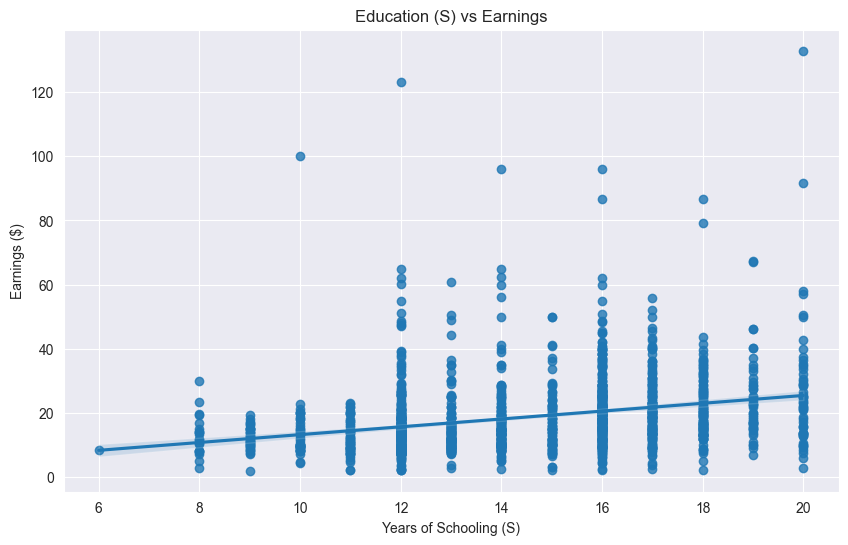

In [356]:
# 교육(S)과 소득(EARNINGS)의 관계 시각화
# 그래프 크기 설정
plt.figure(figsize=(10,6))

# 교육 연수(S)와 소득(EARNINGS) 간의 관계를 회귀선과 함께 시각화
sns.regplot(x=df_data['S'], y=df_data['EARNINGS'])

# 그래프 제목 및 축 레이블 설정
plt.title("Education (S) vs Earnings")  # 그래프 제목
plt.xlabel("Years of Schooling (S)")  # X축: 교육 연수(최종 학력)
plt.ylabel("Earnings ($)")  # Y축: 소득 (달러 기준)

# 그래프 출력
plt.show()

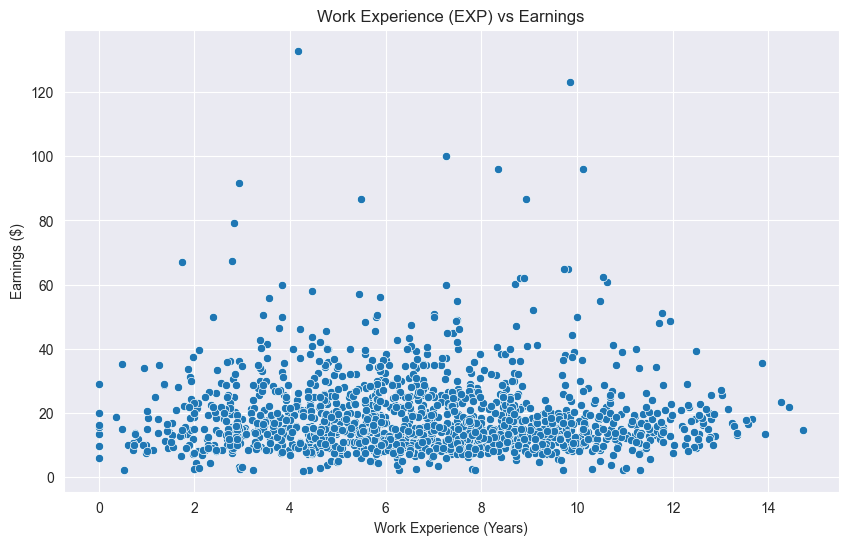

In [357]:
# 경험(EXP)과 소득(EARNINGS)의 관계 시각화

# 그래프 크기 설정
plt.figure(figsize=(10,6))

# 경험(EXP)과 소득(EARNINGS) 간의 관계를 산점도로 표현
sns.scatterplot(x=df_data['EXP'], y=df_data['EARNINGS'])

# 그래프 제목 및 축 레이블 설정
plt.title("Work Experience (EXP) vs Earnings")  # 그래프 제목
plt.xlabel("Work Experience (Years)")  # X축: 업무 경험(경력) 연수
plt.ylabel("Earnings ($)")  # Y축: 소득 (달러 기준)

# 그래프 출력
plt.show()

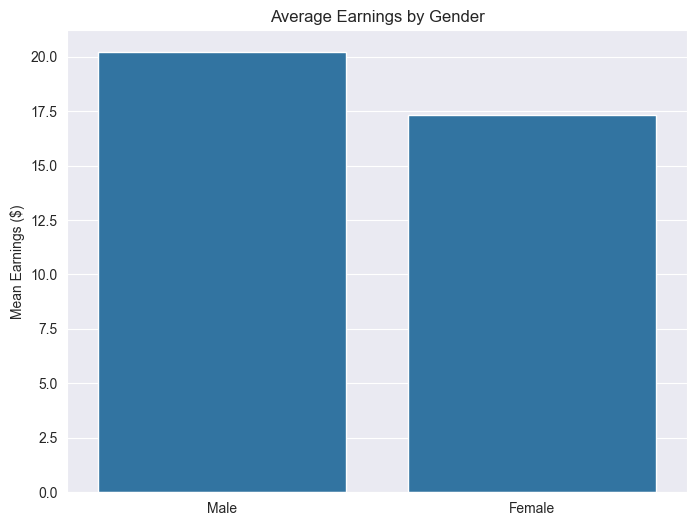

In [358]:
# 성별에 따른 평균 소득 비교
# 그래프 크기 설정
plt.figure(figsize=(8,6))

# 성별에 따른 평균 소득을 바(bar) 차트로 표현
sns.barplot(x=['Male', 'Female'],
            y=[df_data[df_data['MALE']==1]['EARNINGS'].mean(),  # 남성 평균 소득
               df_data[df_data['FEMALE']==1]['EARNINGS'].mean()])  # 여성 평균 소득

# 그래프 제목 및 축 레이블 설정
plt.title("Average Earnings by Gender")  # 그래프 제목
plt.ylabel("Mean Earnings ($)")  # Y축: 평균 소득

# 그래프 출력
plt.show()

# 훈련 & 테스트 데이터셋 분할 (Split Training & Test Dataset)

우리는 전체 데이터를 학습에 사용할 수 없습니다.
<br>
데이터의 20%를 테스트 데이터셋으로 분리하여 나중에 모델 성능을 평가하는 데 사용함.

# 단순 선형 회귀 (Simple Linear Regression)

학교 교육 연수(S)만을 이용하여 소득(EARNINGS)을 예측하는 회귀 모델을 학습.
<br>
sklearn을 활용하여 훈련 데이터에 대해 회귀 분석을 수행하고, 결정 계수(R²)를 확인.

In [359]:
# 단순 선형 회귀 (독립 변수: S)
X_simple = df_data[['S']].copy()
y = df_data['EARNINGS']

# 결측값 처리
X_simple.fillna(X_simple.median(), inplace=True)
y.fillna(y.median(), inplace=True)

# 데이터 분할
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# 모델 학습
simple_model = LinearRegression()
simple_model.fit(X_train_s, y_train_s)

# 예측 및 평가
y_train_pred_s = simple_model.predict(X_train_s)
y_test_pred_s = simple_model.predict(X_test_s)

# 결과 출력
print("단순 선형 회귀 결과:")
print(f"Training R²: {r2_score(y_train_s, y_train_pred_s):.4f}")
print(f"Testing R²: {r2_score(y_test_s, y_test_pred_s):.4f}")
print(f"Training MSE: {mean_squared_error(y_train_s, y_train_pred_s):.4f}")
print(f"Testing MSE: {mean_squared_error(y_test_s, y_test_pred_s):.4f}")
print(f"Training MAE: {mean_absolute_error(y_train_s, y_train_pred_s):.4f}")
print(f"Testing MAE: {mean_absolute_error(y_test_s, y_test_pred_s):.4f}")

단순 선형 회귀 결과:
Training R²: 0.0831
Testing R²: 0.0610
Training MSE: 134.8307
Testing MSE: 122.8715
Training MAE: 7.5370
Testing MAE: 7.5946


### 단순 선형 회귀 결과 : 모델 계수 평가 (Evaluate the Coefficients of the Model)

회귀 계수(기울기)가 예상한 부호(양수 또는 음수)를 갖는지 확인.
<br>
추가적인 학업 연수가 소득에 미치는 영향을 해석.

#### 기울기 (Coefficient for S)

- 기울기의 값이 양수(+)이면, 학력이 증가할수록 소득도 증가함을 의미합니다.
<br>
- 기울기의 값이 음수(-)이면, 학력이 증가할수록 소득이 감소하는 비정상적인 관계를 나타낼 수 있습니다.

#### 절편 (Intercept)

- 절편은 S=0일 때 예상되는 소득을 의미합니다.
<br>
- 일반적으로 의미 있는 값이라기보다는, 모델이 학력과 소득의 관계를 얼마나 설명하는지를 보는 지표로 사용됩니다.

#### 추가적인 학업 연수가 소득에 미치는 영향

- 기울기의 단위는 1년 추가 학업 연수당 증가하는 소득($ 단위) 입니다.

In [360]:
# 회귀 계수 및 절편 출력
slope = simple_model.coef_[0]  # 학력 연수의 회귀 계수
intercept = simple_model.intercept_  # 절편

print("회귀 계수 평가:")
print(f"Intercept (절편): {intercept:.4f}")
print(f"Coefficient for S (기울기): {slope:.4f}")


회귀 계수 평가:
Intercept (절편): 0.2829
Coefficient for S (기울기): 1.2707


In [361]:
# 기울기의 부호 확인
if slope > 0:
    print("학력 연수(S)가 증가할수록 소득(EARNINGS)이 증가하는 경향이 있습니다.")
elif slope < 0:
    print("학력 연수(S)가 증가할수록 소득(EARNINGS)이 감소하는 이상한 경향이 있습니다.")
else:
    print("학력 연수(S)가 소득(EARNINGS)에 미치는 영향이 없습니다.")

학력 연수(S)가 증가할수록 소득(EARNINGS)이 증가하는 경향이 있습니다.


### 단순 선형 회귀 결과: 예측값 및 회귀 잔차 분석 (Analyse the Estimated Values & Regression Residuals)

회귀 모델의 성능은 **잔차(Residuals)**, 즉 **모델의 예측값(ŷᵢ)과 실제값(yᵢ) 간의 차이**에 따라 평가됩니다.

In [362]:
# 잔차 계산
train_residuals = y_train_s - y_train_pred_s
test_residuals = y_test_s - y_test_pred_s

# 잔차의 평균 확인
print("Residual Analysis:")
print(f"Training Residual Mean: {train_residuals.mean():.4f}")
print(f"Testing Residual Mean: {test_residuals.mean():.4f}")

Residual Analysis:
Training Residual Mean: 0.0000
Testing Residual Mean: 0.1322


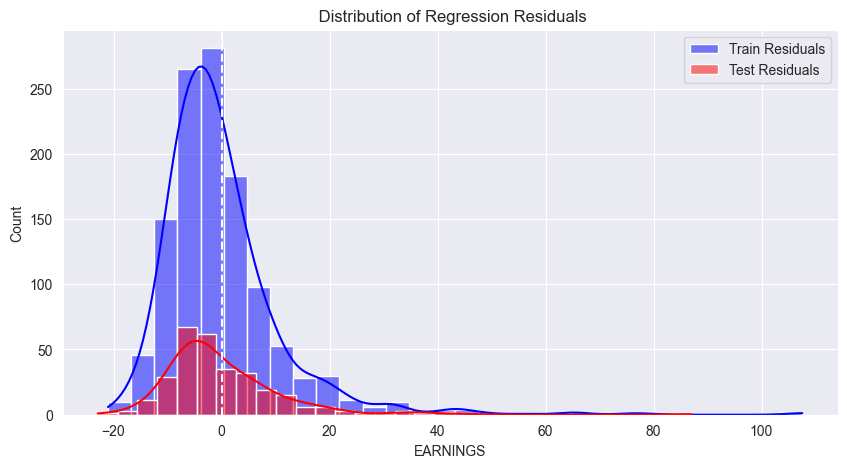

In [363]:
plt.figure(figsize=(10, 5))

# 훈련 데이터의 잔차 분포
sns.histplot(train_residuals, color="blue", label="Train Residuals", kde=True, bins=30)

# 테스트 데이터의 잔차 분포
sns.histplot(test_residuals, color="red", label="Test Residuals", kde=True, bins=30)

# 잔차의 평균 위치 표시
plt.axvline(0, linestyle="--", color="white")
plt.legend()
plt.title(" Distribution of Regression Residuals")
plt.show()

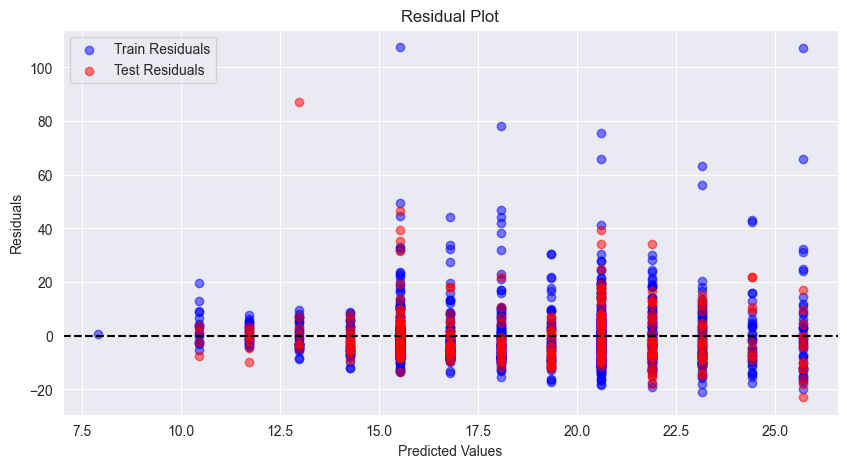

In [364]:
plt.figure(figsize=(10, 5))

# 훈련 데이터의 잔차 플롯
plt.scatter(y_train_pred_s, train_residuals, color="blue", label="Train Residuals", alpha=0.5)

# 테스트 데이터의 잔차 플롯
plt.scatter(y_test_pred_s, test_residuals, color="red", label="Test Residuals", alpha=0.5)

plt.axhline(0, linestyle="--", color="black")  # 잔차가 0인 기준선
plt.legend()
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

## 잔차 분석
- (1) 현재 모델은 선형성이 부족한 문제를 가짐.
- (2) 비선형 관계를 반영하기 위해 다항 회귀를 시도하는 것이 좋음.
- (3) 잔차 분석 결과 이상치 처리도 필요할 가능성이 있음.
- (4) 설명 변수를 추가하여 모델의 예측력을 향상시킬 수 있음.

# 다변량 회귀 (Multivariable Regression)

이제 학력 연수(S)와 총 근무 경력(EXP)을 동시에 사용하여 소득(EARNINGS)을 예측하는 회귀 모델을 학습합니다.

In [365]:
# 1. 독립 변수(X)와 종속 변수(y) 설정
X_multi = df_data[['S', 'EXP']].copy()
y_multi = df_data['EARNINGS']

# 2. 결측값 처리 (중앙값 대체)
X_multi.fillna(X_multi.median(), inplace=True)
y_multi.fillna(y_multi.median(), inplace=True)

# 3. 데이터 분할 (훈련 80%, 테스트 20%)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# 4. 데이터 표준화 (Scaling)
scaler_m = StandardScaler()
X_train_m_scaled = scaler_m.fit_transform(X_train_m)
X_test_m_scaled = scaler_m.transform(X_test_m)

# 5. 다변량 선형 회귀 모델 학습
multi_model = LinearRegression()
multi_model.fit(X_train_m_scaled, y_train_m)

# 6. 모델 평가 (R², MSE, MAE)
y_train_pred_m = multi_model.predict(X_train_m_scaled)
y_test_pred_m = multi_model.predict(X_test_m_scaled)

print("다변량 회귀 결과:")
print(f"Training R²: {r2_score(y_train_m, y_train_pred_m):.4f}")
print(f"Testing R²: {r2_score(y_test_m, y_test_pred_m):.4f}")
print(f"Training MSE: {mean_squared_error(y_train_m, y_train_pred_m):.4f}")
print(f"Testing MSE: {mean_squared_error(y_test_m, y_test_pred_m):.4f}")
print(f"Training MAE: {mean_absolute_error(y_train_m, y_train_pred_m):.4f}")
print(f"Testing MAE: {mean_absolute_error(y_test_m, y_test_pred_m):.4f}")

다변량 회귀 결과:
Training R²: 0.1195
Testing R²: 0.0731
Training MSE: 129.4868
Testing MSE: 121.2776
Training MAE: 7.3479
Testing MAE: 7.4724


### 다변량 회귀: 모델 계수 평가 (Evaluate the Coefficients of the Model)

In [366]:
# 7. 회귀 계수 출력
coefficients_m = dict(zip(['S', 'EXP'], multi_model.coef_))
print("Regression Coefficients:", coefficients_m)

Regression Coefficients: {'S': np.float64(5.071440645525055), 'EXP': np.float64(2.797445116311098)}


#### 다변량 회귀 모델 계수의 의미 해석
##### S (학력 연수) 계수: 5.0714
- 학력이 1년 증가할 때마다 평균적으로 소득(EARNINGS)이 약 5.07 단위 증가한다는 의미.

##### EXP (총 근무 경력) 계수: 2.7974
- 경력이 1년 증가할 때마다 평균적으로 소득이 약 2.80 단위 증가.

### 다변량 회귀: 예측값 및 회귀 잔차 분석 (Analyse the Estimated Values & Regression Residuals)

In [367]:
# 1. 잔차 계산
train_residuals_m = y_train_m - y_train_pred_m
test_residuals_m = y_test_m - y_test_pred_m

# 2. 잔차 평균 확인 (잔차의 평균이 0에 가까우면 좋은 모델)
print("Residual Analysis:")
print(f"Training Residual Mean: {train_residuals_m.mean():.4f}")
print(f"Testing Residual Mean: {test_residuals_m.mean():.4f}")

Residual Analysis:
Training Residual Mean: 0.0000
Testing Residual Mean: -0.0444


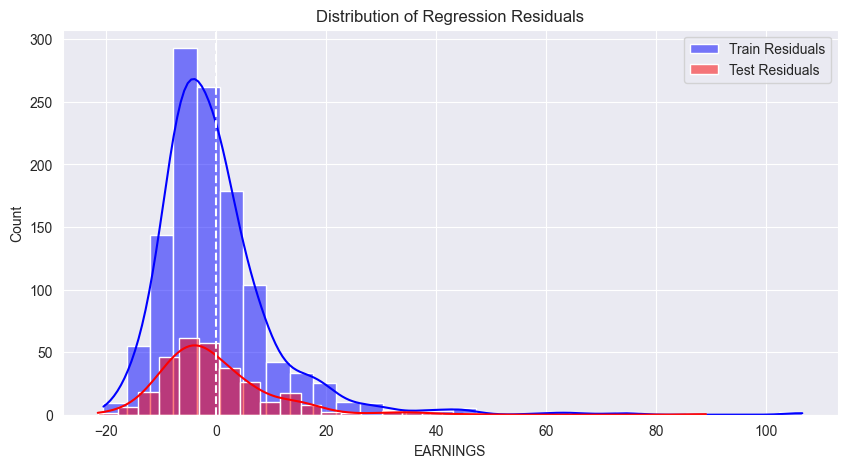

In [368]:
# 3. 잔차 시각화 (히스토그램)
plt.figure(figsize=(10, 5))
sns.histplot(train_residuals_m, color="blue", label="Train Residuals", kde=True, bins=30)
sns.histplot(test_residuals_m, color="red", label="Test Residuals", kde=True, bins=30)
plt.axvline(0, linestyle="--", color="white")
plt.legend()
plt.title("Distribution of Regression Residuals")
plt.show()

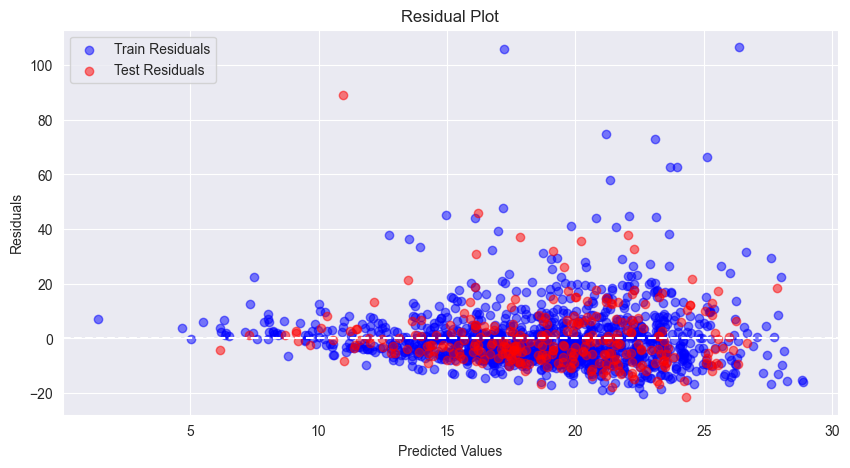

In [369]:
plt.figure(figsize=(10, 5))
plt.scatter(y_train_pred_m, train_residuals_m, color="blue", alpha=0.5, label="Train Residuals")
plt.scatter(y_test_pred_m, test_residuals_m, color="red", alpha=0.5, label="Test Residuals")
plt.axhline(0, linestyle="--", color="white")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend()
plt.title("Residual Plot")
plt.show()

### 1. 잔차 평균 확인
- 훈련 데이터 잔차 평균: 0.0000 (이상적)
- 테스트 데이터 잔차 평균: -0.0444 (거의 0에 가까움)
### 해석
- 잔차 평균이 거의 0에 가깝기 때문에 모델이 데이터의 중심을 잘 맞추고 있음을 의미함.

### 2. 잔차 분포 그래프(히스토그램)
- 훈련 데이터(파란색)와 테스트 데이터(빨간색) 잔차가 대체로 정규분포 형태를 띄고 있슴.
- 다만, 우측(양의 값)으로 긴 꼬리(long tail) 를 가지고 있어 소득(EARNINGS)의 일부 예측값이 실제 값보다 작게 예측되는 경향이 있음을 알 수 있슴.
- 이상치(outliers) 가능성이 있으므로, 데이터 정제(이상치 제거)나 변수 추가를 고려할 수 있슴.

### 3. 잔차 산점도(Residual Plot)
- 이상적으로는 잔차가 0을 중심으로 랜덤하게 분포해야 함.
- 그러나 위 그래프에서 볼 수 있듯이, 예측값(Predicted Values)이 커질수록 잔차가 커지는 패턴이 보임.

- 즉, 모델이 고소득자(EARNINGS가 높은 값)를 제대로 예측하지 못하고 있음.
    - 이는 모델이 고소득 데이터를 충분히 학습하지 못했거나, 선형 회귀가 고소득 예측에 적절하지 않을 가능성을 의미함.

# 모델을 사용하여 예측하기 (Use Your Model to Make a Prediction)

**2011년 기준, 학사 학위(12 + 4년의 교육)와 5년의 근무 경험이 있는 사람은 얼마를 벌 것으로 예상.**
<br>
How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [370]:
# 표준화 객체 선언 (전역으로 선언)
scaler = StandardScaler()

# 특정 조건을 만족하는 데이터 선택 (학력 16년, 경력 5년)
df_filtered = df_data[(df_data["S"] == 16) & (df_data["EXP"] == 5)]

# 필터링된 데이터가 있는지 확인
if df_filtered.empty:
    print("조건을 만족하는 데이터가 없습니다.")
else:
    # 필터링된 데이터를 모델에 입력
    X_new = df_filtered[["S", "EXP"]]

    # 기존에 학습한 scaler가 있어야 함
    # scaler가 fit되지 않았다면, fit을 수행
    if not hasattr(scaler, 'scale_'):  # scaler가 fit되지 않았다면
        scaler.fit(X_train_m)  # 학습 데이터로 먼저 fit

    # 표준화 적용 (기존 학습된 scaler 사용)
    X_new_scaled = scaler.transform(X_new)

    # 모델을 사용하여 예측
    predicted_earnings = multi_model.predict(X_new_scaled)

    print(f"2011년 기준, 학사 학위(16년)와 5년 경력 보유자의 예상 소득: {predicted_earnings.mean():.2f}")


2011년 기준, 학사 학위(16년)와 5년 경력 보유자의 예상 소득: 19.79


# 추가 실험 및 심화 탐구 (Experiment and Investigate Further)

회귀 분석을 개선하여 소득 예측을 더 정확하게 만들기 위해 어떤 추가적인 특징(Feature)을 고려
<br>
Which other features could you consider adding to further improve the regression to better predict earnings?

### 추가적인 변수 HHINC97 (가구 소득, Household Income in 1997)을 포함하여,
- 소득(EARNINGS)을 예측하는 모델을 개선시도

In [378]:
# 1. 독립 변수(X)와 종속 변수(y) 설정
X = df_data[['S', 'EXP', 'HHINC97']].copy()
y = df_data['EARNINGS']

# 2. 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 데이터 표준화 (Scaling)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 5. 모델 평가 (R², MSE, MAE)
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

print("Linear Regression Performance:")
# 결정 계수
print("Training R²:", model.score(X_train_scaled, y_train))
print("Testing R²:", model.score(X_test_scaled, y_test))
# 평균 제곱오차
print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Testing MSE:", mean_squared_error(y_test, y_test_pred))
# 평균 절대오차
print("Training MAE:", mean_absolute_error(y_train, y_train_pred))
print("Testing MAE:", mean_absolute_error(y_test, y_test_pred))

Linear Regression Performance:
Training R²: 0.13413064663748753
Testing R²: 0.08130594219259002
Training MSE: 127.32889978851361
Testing MSE: 120.20893442360357
Training MAE: 7.2915647144215265
Testing MAE: 7.334530688842404


### 모델 계수 평가 (Evaluate the Coefficients of the Model)

회귀 계수(기울기)가 예상한 부호(양수 또는 음수)를 갖는지 확인!

In [372]:
# 8. 회귀 계수 출력
coefficients = dict(zip(X.columns, model.coef_))
print("Regression Coefficients:", coefficients)

Regression Coefficients: {'S': np.float64(4.561528027614302), 'EXP': np.float64(2.622078717867722), 'HHINC97': np.float64(1.5323015123226942)}


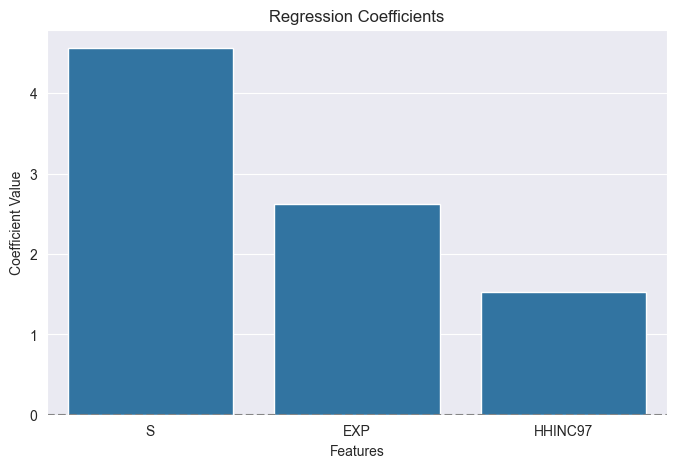

In [373]:
# 회귀 계수를 시각적으로 확인하기 위한 막대 그래프
plt.figure(figsize=(8, 5))
sns.barplot(x=list(coefficients.keys()), y=list(coefficients.values()))
plt.axhline(0, color='gray', linestyle='--')  # 0을 기준선으로 추가
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Regression Coefficients")
plt.show()

### 주요 문제 분석:
#### R² 값이 매우 낮음

- Training R² (0.134): 훈련 데이터에서 예측력이 낮음
- Testing R² (0.081): 테스트 데이터에서 더 낮음 → 일반화가 제대로 되지 않음
- 일반적으로 R² 값이 0.5 미만이면 모델의 설명력이 낮다고 판단할 수 있습니다.

#### MSE 값이 높음

- Training MSE: 127.33 vs. Testing MSE: 120.20 → 예측 오차가 큼
- 이는 모델이 학습을 잘하지 못했거나, 데이터가 선형 회귀에 적합하지 않다는 신호입니다.

#### MAE 값도 높음

- MAE 값이 7 이상으로 나타나며, 이는 예측값과 실제값 사이의 평균적인 차이가 크다는 것을 의미합니다.

#### 새로운 변수가 모델에 미친 영향
##### ✔ HHINC97(가구 소득) 추가 효과
- 성능 향상 여부: 기존 S, EXP 모델의 R² (약 0.12 → 0.13) 향상 효과는 미미
- 오차(MSE, MAE)가 여전히 큼 → 예측력이 개선되지 않음
- 결론: 가구 소득이 개인 소득 예측에 크게 기여하지 않는 것으로 보임.


### 해결 방법:
#### 더 많은 독립 변수 추가 (특징 엔지니어링)
- 기존의 S, EXP, HHINC97 외에도 성별, 교육 수준, 근무 시간 등을 추가하여 설명력을 높일 수 있음.

#### 다항 회귀(Polynomial Features) 적용
- 현재 모델이 선형 관계를 가정하지만, S^2 (교육 연수의 제곱) 같은 비선형 관계를 고려하는 것이 성능을 향상시킬 수 있음


In [379]:
# 1. 사용할 변수 선택 (독립 변수 추가)
features = ['S', 'EXP', 'HHINC97', 'FEMALE', 'MALE', 'HOURS', 'EDUCHSD', 'EDUCBA']

X = df_data[features].copy()
y = df_data['EARNINGS']

# 2. 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 데이터 표준화 (Scaling)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. 다항 특성 추가 (Polynomial Features)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# 5. 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train_poly, y_train)

# 6. 모델 평가 (R², MSE, MAE)
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

print("Linear Regression Performance (다항 회귀 적용):")
print(f"Training R²: {r2_score(y_train, y_train_pred):.4f}")
print(f"Testing R²: {r2_score(y_test, y_test_pred):.4f}")
print(f"Training MSE: {mean_squared_error(y_train, y_train_pred):.4f}")
print(f"Testing MSE: {mean_squared_error(y_test, y_test_pred):.4f}")
print(f"Training MAE: {mean_absolute_error(y_train, y_train_pred):.4f}")
print(f"Testing MAE: {mean_absolute_error(y_test, y_test_pred):.4f}")

# 7. 회귀 계수 출력
coeff_df = pd.DataFrame({
    'Feature': poly.get_feature_names_out(features),
    'Coefficient': model.coef_
})

# 계수를 절대값 기준으로 정렬
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False)

# 보기 좋게 출력
print("회귀 계수 (Regression Coefficients):\n")
print(coeff_df.to_string(index=False))

Linear Regression Performance (다항 회귀 적용):
Training R²: 0.2050
Testing R²: 0.1354
Training MSE: 116.9079
Testing MSE: 113.1257
Training MAE: 6.8688
Testing MAE: 7.0137
회귀 계수 (Regression Coefficients):

        Feature  Coefficient
              S         4.14
            EXP         2.76
        HHINC97         2.54
      S HHINC97         1.56
            S^2         1.02
    EXP HHINC97         0.90
           MALE         0.87
  HOURS EDUCHSD         0.80
          HOURS         0.79
   HOURS EDUCBA         0.74
          S EXP         0.70
       EXP MALE         0.53
  HHINC97 HOURS         0.49
    MALE EDUCBA         0.47
         EDUCBA         0.41
   MALE EDUCHSD         0.35
       EDUCBA^2         0.34
 HHINC97 FEMALE         0.22
     MALE HOURS         0.19
    FEMALE MALE         0.06
          EXP^2         0.01
         S MALE         0.01
       S FEMALE        -0.01
      EXP HOURS        -0.02
        HOURS^2        -0.02
HHINC97 EDUCHSD        -0.03
     EXP EDUCBA 

### 예측값 및 회귀 잔차 분석 (Analyse the Estimated Values & Regression Residuals)

회귀 모델의 성능은 **잔차(Residuals)**, 즉 **모델의 예측값(ŷᵢ)과 실제값(yᵢ) 간의 차이**에 따라 평가됩니다.
<br>
잔차의 분포에서 어떤 패턴이 보이나요?
<br>
How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

In [375]:
# 9. 잔차 분석 (Residuals)
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

print("Residual Analysis:")
print(f"Training Residual Mean: {train_residuals.mean():.4f}")
print(f"Testing Residual Mean: {test_residuals.mean():.4f}")


Residual Analysis:
Training Residual Mean: 0.0000
Testing Residual Mean: 0.1558


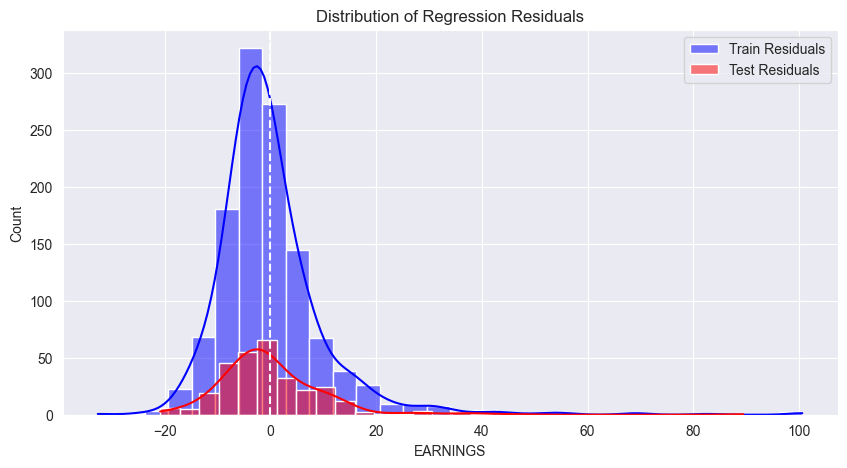

In [376]:
# 잔차 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(train_residuals, color="blue", label="Train Residuals", kde=True, bins=30)
sns.histplot(test_residuals, color="red", label="Test Residuals", kde=True, bins=30)
plt.axvline(0, linestyle="--", color="white")
plt.legend()
plt.title("Distribution of Regression Residuals")
plt.show()

### 모델 성능 평가:
#### 1. R² 값 비교
- Training R²: 0.2050 → 이전보다 향상됨

- Testing R²: 0.1354 → 이전보다 향상됨

- 해석:
    - 다항 회귀를 적용한 후 결정 계수(R²)가 증가했으므로 모델이 종속 변수(EARNINGS)를 더 잘 설명하고 있다고 볼 수 있음.
    - 그러나 여전히 R² 값이 낮아 모델이 충분히 좋은 성능을 내고 있지는 않음.

#### 2. 오차 비교 (MSE, MAE)
- Training MSE: 116.9079 → 기존보다 낮아짐

- Testing MSE: 113.1257 → 기존보다 낮아짐

- Training MAE: 6.8688 → 기존보다 낮아짐

- Testing MAE: 7.0137 → 기존보다 낮아짐

- 해석:
    - MSE와 MAE 값이 낮아졌으므로 모델의 예측 오차가 줄어든 것을 확인할 수 있음.
    - 이는 다항 회귀가 데이터를 더 잘 적합시켰다는 것을 의미.

#### 3. 잔차 분석 (Residual Analysis)
- Training Residual Mean: 0.0000 → 이상적

- Testing Residual Mean: 0.1558 → 약간 증가

- 해석:
    - 잔차 평균이 0에 가까울수록 모델이 편향되지 않고 예측하는 것이므로 훈련 데이터에서는 적절하게 학습되었음.
    - 다만 테스트 데이터에서의 평균이 증가했으므로 약간의 편향이 생길 가능성이 있음.

### 결론
- 다항 회귀를 추가함으로써 모델의 예측 성능이 향상되었음 (R² 증가, 오차 감소).
- 하지만 여전히 설명력이 낮고(낮은 R² 값), 모델의 일반화 성능이 완벽하진 않음.